<a href="https://colab.research.google.com/github/Yash-Pandey007/Wallmart_Sales/blob/main/Walmart_Salesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1PvpVvgNb0gdtNpOOJiac7rHcQD3fanhIgcaF_QfVgR8')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
2,1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
3,1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
4,1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
5,1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 1 to 6435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         6435 non-null   object
 1   Date          6435 non-null   object
 2   Weekly_Sales  6435 non-null   object
 3   Holiday_Flag  6435 non-null   object
 4   Temperature   6435 non-null   object
 5   Fuel_Price    6435 non-null   object
 6   CPI           6435 non-null   object
 7   Unemployment  6435 non-null   object
dtypes: object(8)
memory usage: 402.3+ KB


In [64]:
n_df = pd.DataFrame()

In [65]:
for i in df.columns:
  n_df[i] = pd.to_numeric(df[i], errors='coerce')

In [66]:
n_df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [67]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 1 to 6435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [68]:
n_df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

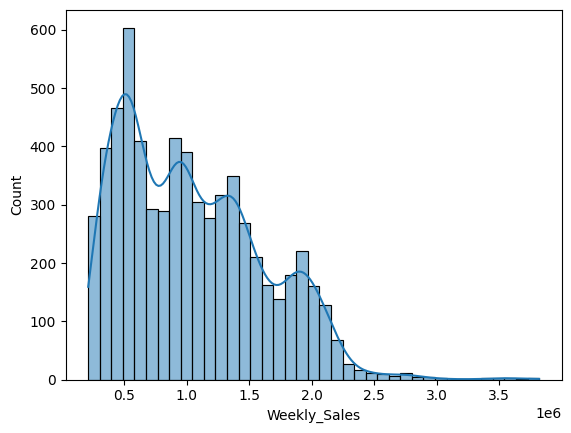

In [69]:
sns.histplot(n_df["Weekly_Sales"],kde=True)

<Axes: ylabel='Weekly_Sales'>

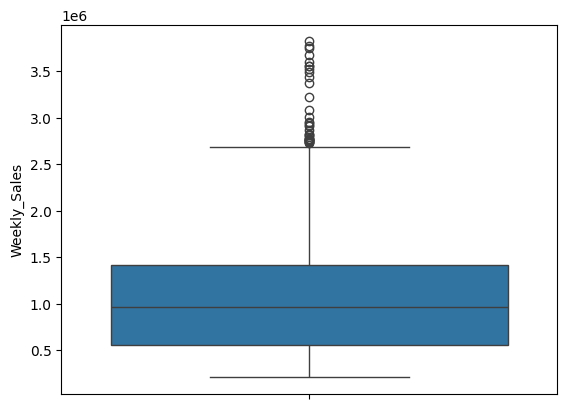

In [70]:
sns.boxplot(n_df["Weekly_Sales"])

In [71]:
from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)
n_df['Weekly_Sales'] = transform.fit_transform(n_df["Weekly_Sales"])

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

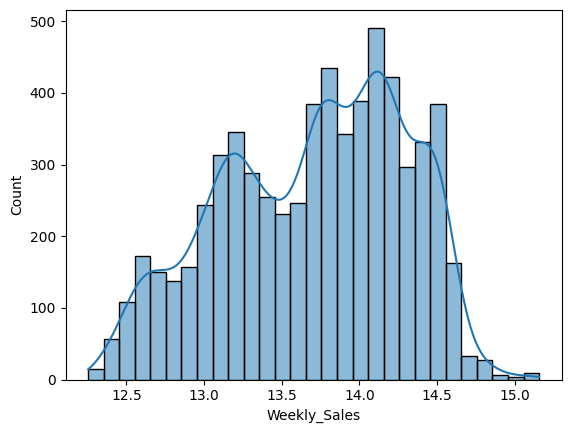

In [72]:
sns.histplot(n_df["Weekly_Sales"],kde=True)

<Axes: ylabel='Weekly_Sales'>

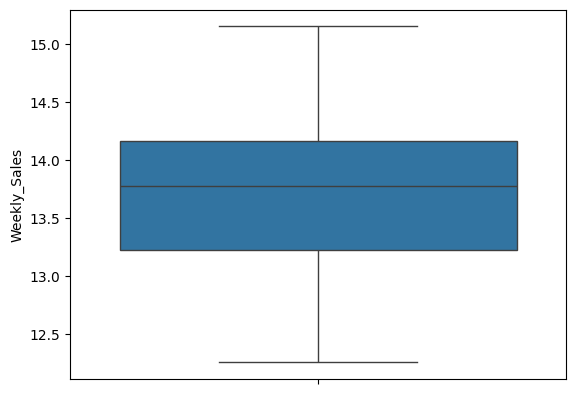

In [73]:
sns.boxplot(n_df["Weekly_Sales"])

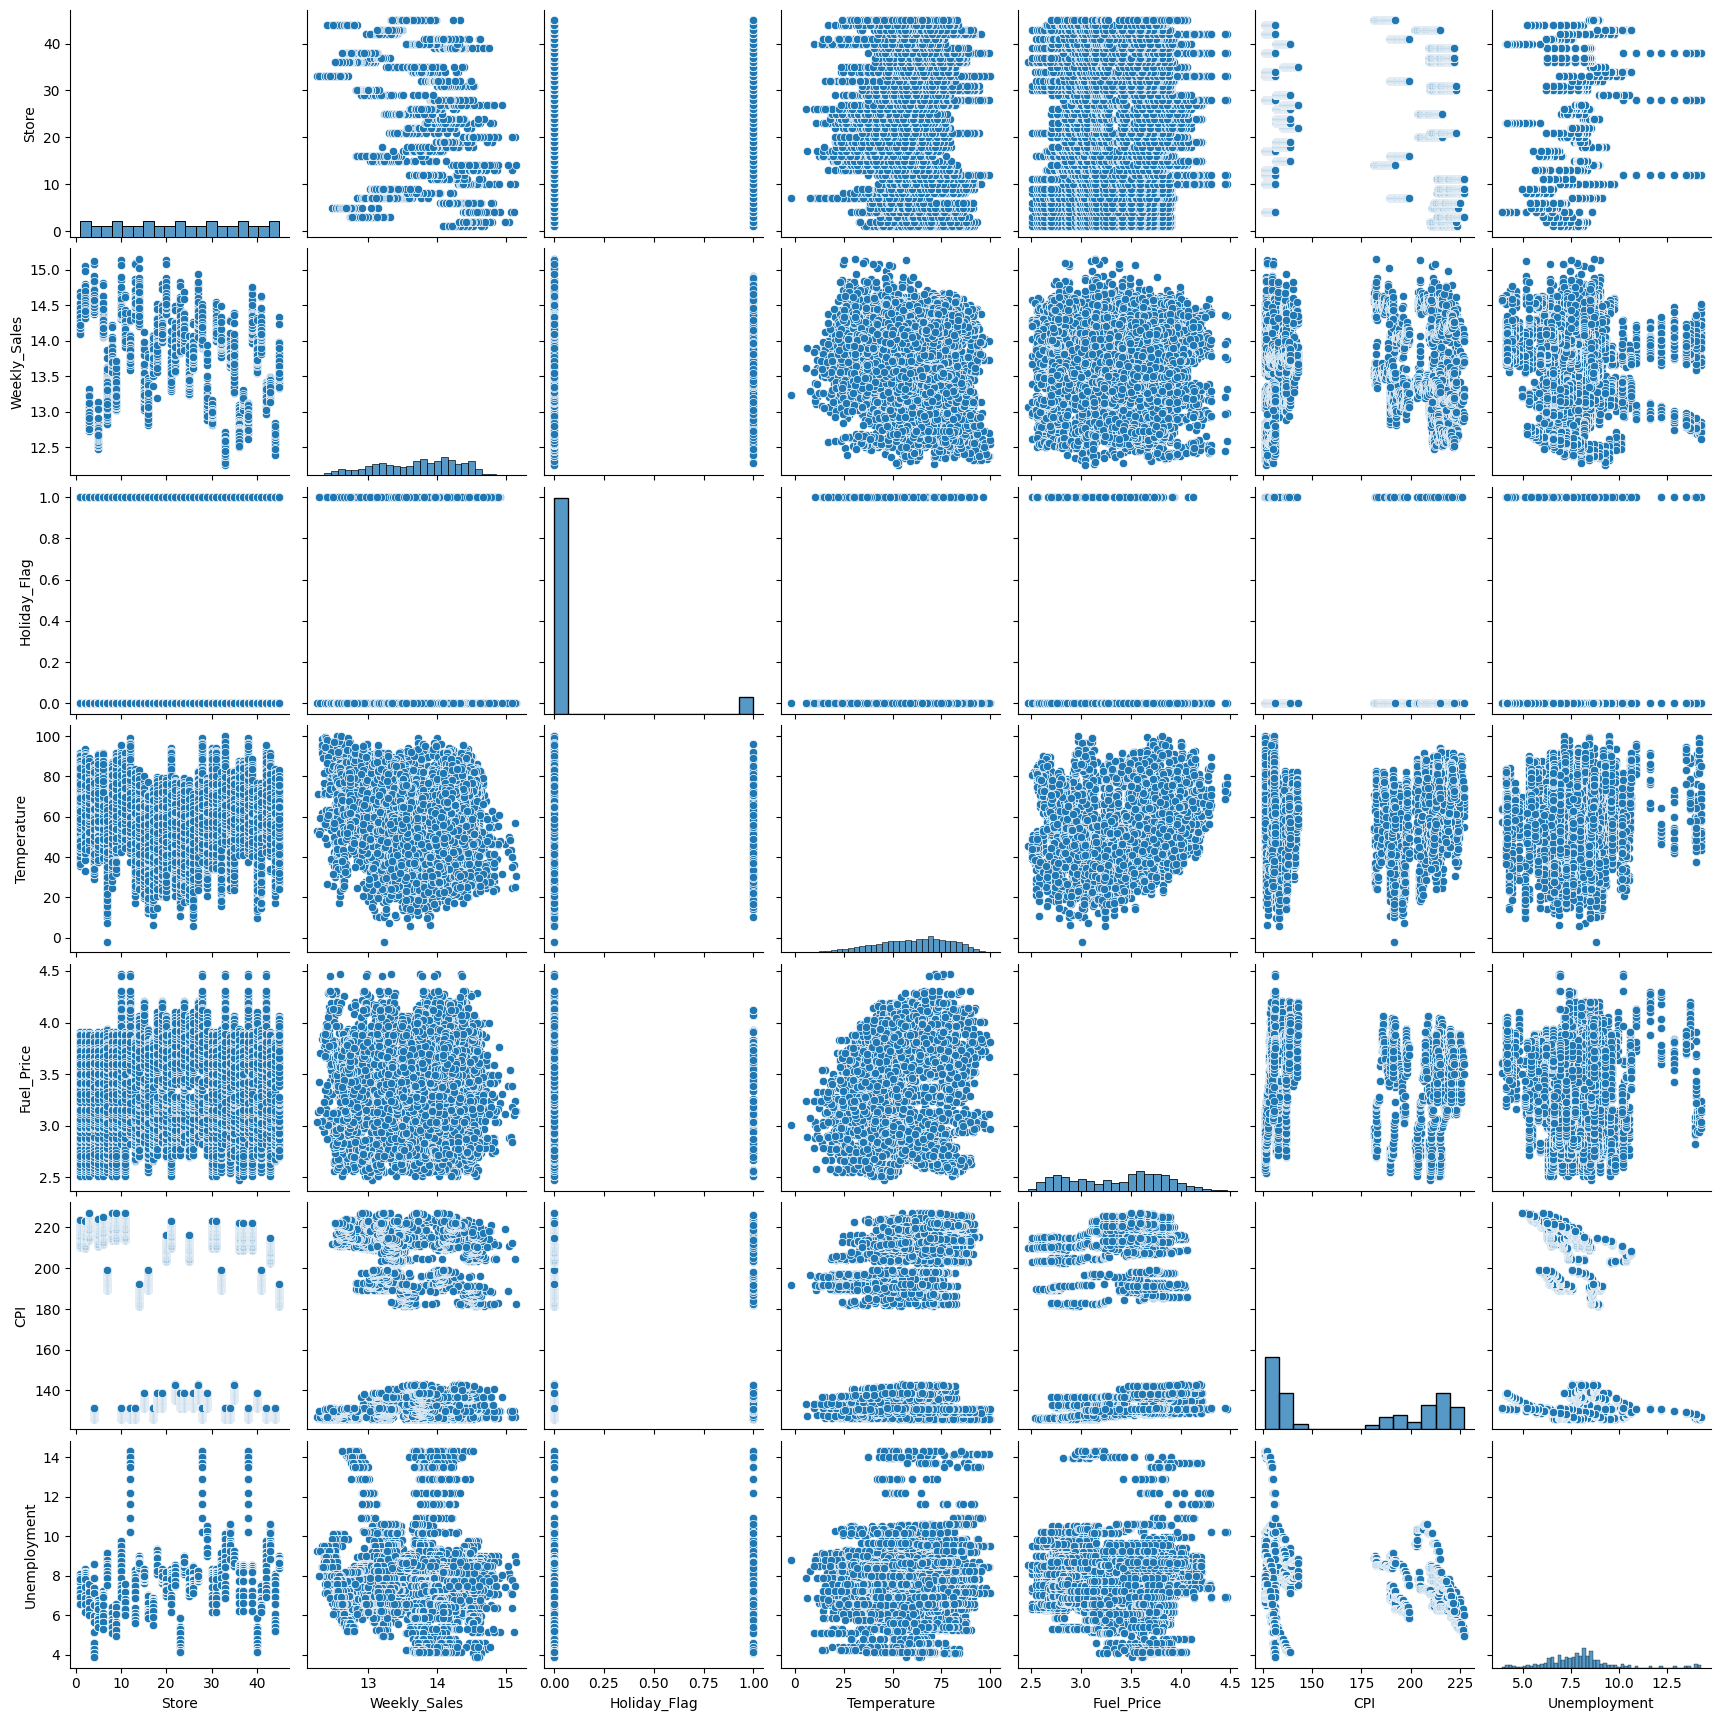

In [74]:
sns.pairplot(n_df)

In [75]:
x = n_df.drop(["Weekly_Sales","Date"],axis=1)
y = n_df["Weekly_Sales"]

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.12350418210746705
MSE:  0.3088557636583934


In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
from sklearn.linear_model import LinearRegression
# Create polynomial features
for i in range(1,10):
  print("Degree: ",i)
  poly = PolynomialFeatures(degree=i)  # Specify the degree of the polynomial
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  # Initialize and fit the Linear Regression model
  lr = LinearRegression()
  lr.fit(x_train_poly, y_train)

  # Make predictions
  y_pred = lr.predict(x_test_poly)

  # Print evaluation metrics
  print("R2 Score: ", r2_score(y_test, y_pred))
  print("MSE: ", mean_squared_error(y_test, y_pred))

Degree:  1
R2 Score:  0.12350418210746694
MSE:  0.30885576365839346
Degree:  2
R2 Score:  0.28189676277147735
MSE:  0.25304207868676165
Degree:  3
R2 Score:  0.4075140832102869
MSE:  0.2087775965970061
Degree:  4
R2 Score:  0.5495760915019897
MSE:  0.15871840730928427
Degree:  5
R2 Score:  0.5902212539405199
MSE:  0.14439604269817224
Degree:  6
R2 Score:  0.5504292866321611
MSE:  0.15841776214007822
Degree:  7
R2 Score:  0.3899463064835227
MSE:  0.21496805294141982
Degree:  8
R2 Score:  0.4728537655181073
MSE:  0.185753485056005
Degree:  9
R2 Score:  0.47328622112311824
MSE:  0.18560109824090854


In [81]:
poly = PolynomialFeatures(degree=7)  # Specify the degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# Make predictions
y_pred = lr.predict(x_test_poly)

# Print evaluation metrics
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.3899463064835227
MSE:  0.21496805294141982


In [82]:
from sklearn.tree import DecisionTreeRegressor
for i in range(10,100,10):
  print("Max Depth: ",i)
  dt = DecisionTreeRegressor(max_depth=i)
  dt.fit(x_train,y_train)
  y_pred = dt.predict(x_test)
  print("R2 Score: ",r2_score(y_test,y_pred))
  print("MSE: ",mean_squared_error(y_test,y_pred))

Max Depth:  10
R2 Score:  0.9516265264909207
MSE:  0.017045633072589956
Max Depth:  20
R2 Score:  0.9426689958888539
MSE:  0.020202048537579655
Max Depth:  30
R2 Score:  0.9421743649109305
MSE:  0.02037634443870891
Max Depth:  40
R2 Score:  0.946068633437531
MSE:  0.019004099123761484
Max Depth:  50
R2 Score:  0.9429496418705607
MSE:  0.020103155733725602
Max Depth:  60
R2 Score:  0.945000283007231
MSE:  0.019380559776817952
Max Depth:  70
R2 Score:  0.9424608253929759
MSE:  0.02027540274665063
Max Depth:  80
R2 Score:  0.9445212792495128
MSE:  0.019549349026424464
Max Depth:  90
R2 Score:  0.9421274951706752
MSE:  0.020392860192832932


In [83]:
from sklearn.ensemble import RandomForestRegressor
for i in range(10,100,10):
  print("Estimators: ",i)
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  print("R2 Score: ",r2_score(y_test,y_pred))
  print("MSE: ",mean_squared_error(y_test,y_pred))

Estimators:  10
R2 Score:  0.9668268377610043
MSE:  0.011689413853592425
Estimators:  20
R2 Score:  0.968101465320095
MSE:  0.011240266167880058
Estimators:  30
R2 Score:  0.9680522628607531
MSE:  0.01125760391535553
Estimators:  40
R2 Score:  0.9676597176591641
MSE:  0.011395927277010222
Estimators:  50
R2 Score:  0.9678047075536472
MSE:  0.011344836371989145
Estimators:  60
R2 Score:  0.9686111191434176
MSE:  0.01106067658217938
Estimators:  70
R2 Score:  0.9692855373646074
MSE:  0.010823028038422984
Estimators:  80
R2 Score:  0.9686171927183328
MSE:  0.011058536402408638
Estimators:  90
R2 Score:  0.9690406005636806
MSE:  0.010909337797299164


In [86]:
from xgboost import XGBRegressor
for i in range(15):
  print("Max Depth: ",i)
  xgb = XGBRegressor(max_depth=i)
  xgb.fit(x_train,y_train)
  y_pred = xgb.predict(x_test)
  print("R2 Score: ",r2_score(y_test,y_pred))
  print("MSE: ",mean_squared_error(y_test,y_pred))

Max Depth:  0
R2 Score:  0.9646594176955151
MSE:  0.012453159858798444
Max Depth:  1
R2 Score:  0.4820969751317369
MSE:  0.18249640327010858
Max Depth:  2
R2 Score:  0.9459365045928568
MSE:  0.019050658108288397
Max Depth:  3
R2 Score:  0.9704795405042267
MSE:  0.010402290433097797
Max Depth:  4
R2 Score:  0.9769270368781586
MSE:  0.008130349853799313
Max Depth:  5
R2 Score:  0.97982373089944
MSE:  0.007109625480945256
Max Depth:  6
R2 Score:  0.9806257294668463
MSE:  0.006827020732659306
Max Depth:  7
R2 Score:  0.9802647212025267
MSE:  0.006954231246260493
Max Depth:  8
R2 Score:  0.979398323553724
MSE:  0.007259528661251243
Max Depth:  9
R2 Score:  0.9772634992502334
MSE:  0.008011788714375611
Max Depth:  10
R2 Score:  0.9742132218464273
MSE:  0.009086632127990128
Max Depth:  11
R2 Score:  0.9726617580993525
MSE:  0.009633330139103568
Max Depth:  12
R2 Score:  0.9705917642271578
MSE:  0.010362745528331684
Max Depth:  13
R2 Score:  0.9679160882897213
MSE:  0.011305588515245575
Max De

In [87]:
xgb = XGBRegressor(max_depth=7)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.9802647212025267
MSE:  0.006954231246260493
